# **DATASET INFORMATION**
The company needs a comparison of the performance of each branch in various cities in 2019. Samples will be collected from the five major cities on the island of Java to be described in terms of order size, number of consumers, number of items, number of brands, and GMV every month.

This is 4 csv files containing retail data for each quarter:
*   (Data from January - March) --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv
*   (Data from April - June) --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv
*   (Data from July - September) --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv
*   (Data from October - December) --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv






# **TASK**

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

## [1] Load Data

In [66]:
retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

## [2] Data Validation and Transformation






View the top 5 data

In [67]:
retail_data1.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,total_price
0,1612885,01-01-19,16293,Malang,Jawa Timur,P1301,BRAND_F,6,747000,4482000
1,1612387,01-01-19,17228,Bogor,Jawa Barat,P2086,BRAND_L,4,590000,2360000
2,1612903,01-01-19,16775,Surakarta,Jawa Tengah,P1656,BRAND_G,3,1325000,3975000
3,1612963,01-01-19,0,unknown,unknown,P3127,BRAND_S,1,1045000,1045000
4,1612915,01-01-19,0,unknown,unknown,P1230,BRAND_E,1,-891000,891000


Examine the column list for all data frames to see if all of the columns from the four different data frames have the same structure

In [68]:
print('Kolom retail_data1: %s\n' %retail_data1.columns)
print('Kolom retail_data2: %s\n' %retail_data2.columns)
print('Kolom retail_data3: %s\n' %retail_data3.columns)
print('Kolom retail_data4: %s\n' %retail_data4.columns)

Kolom retail_data1: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price', 'total_price'],
      dtype='object')

Kolom retail_data2: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price', 'total_price'],
      dtype='object')

Kolom retail_data3: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price', 'total_price'],
      dtype='object')

Kolom retail_data4: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price', 'total_price'],
      dtype='object')



If the structure is the same, they are combined

In [69]:
retail_table = pd.concat([retail_data1,retail_data2,retail_data3,retail_data4])
print('\nJumlah baris:', retail_table.shape[0])



Jumlah baris: 50856


Examine the merged data frame information

In [70]:
retail_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50856 entries, 0 to 20182
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     50856 non-null  object
 1   order_date   50856 non-null  object
 2   customer_id  50856 non-null  int64 
 3   city         50856 non-null  object
 4   province     50856 non-null  object
 5   product_id   50856 non-null  object
 6   brand        50856 non-null  object
 7   quantity     50856 non-null  int64 
 8   item_price   50856 non-null  int64 
 9   total_price  50856 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 4.3+ MB


Print statistics for merged data frames

In [71]:
 retail_table.describe()

,customer_id,quantity,item_price,total_price
count,50856.000000,50856.000000,5.085600e+04,5.085600e+04
mean,11516.434993,10.504680,1.345225e+06,7.020933e+06
std,6762.130438,41.966574,7.306866e+06,2.689227e+07
min,0.000000,1.000000,-8.910000e+05,-8.910000e+05
25%,12370.000000,1.000000,4.500000e+05,1.356000e+06
50%,14378.000000,4.000000,7.400000e+05,3.536000e+06
75%,16284.000000,11.000000,1.458000e+06,6.270000e+06
max,18287.000000,3114.000000,7.399120e+08,2.326158e+09


## [3] Data Transformation

If there is data that is not appropriate, it can be discarded.

In [72]:
cek = retail_table.loc[(retail_table['item_price'] < 0) | retail_table['total_price'] < 0]
print('item_price < 0 or total_price < 0:\n\n', cek)
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)]

item_price < 0 or total_price < 0:

 Empty DataFrame
Columns: [order_id, order_date, customer_id, city, province, product_id, brand, quantity, item_price, total_price]
Index: []


In [73]:
cek = retail_table.loc[retail_table['order_id'] == 'undefined']
print('\norder_id with undefined value:\n\n', cek)
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']


order_id with undefined value:

     order_id order_date  customer_id           city     province product_id  \
9  undefined   01-07-19        15150  Jakarta Pusat  DKI Jakarta      P3694   

     brand  quantity  item_price  total_price  
9  BRAND_T        12      159000      1908000  


If there is a column that should be of type **datetime64**, change it

In [82]:
retail_table['order_id'] = retail_table['order_id'].astype('int64')
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])

Double-check the data frame information

In [83]:
retail_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32736 entries, 0 to 20182
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     32736 non-null  int64         
 1   order_date   32736 non-null  datetime64[ns]
 2   customer_id  32736 non-null  int64         
 3   city         32736 non-null  object        
 4   province     32736 non-null  object        
 5   product_id   32736 non-null  object        
 6   brand        32736 non-null  object        
 7   quantity     32736 non-null  int64         
 8   item_price   32736 non-null  int64         
 9   total_price  32736 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 2.7+ MB


Print descriptive statistics from the data frame

In [84]:
retail_table.describe()

,order_id,customer_id,quantity,item_price,total_price
count,3.273600e+04,32736.000000,32736.000000,3.273600e+04,3.273600e+04
mean,1.683115e+06,15523.982374,11.867424,1.027177e+06,7.317725e+06
std,3.790552e+04,1594.595919,44.712890,2.806161e+06,2.968270e+07
min,1.612378e+06,12747.000000,1.000000,1.200000e+04,-5.200000e+05
25%,1.649893e+06,14163.000000,2.000000,4.500000e+05,1.480000e+06
50%,1.686484e+06,15484.000000,4.000000,6.950000e+05,3.816000e+06
75%,1.716688e+06,16915.000000,12.000000,1.325000e+06,6.285000e+06
max,1.742998e+06,18287.000000,3114.000000,4.445330e+08,2.326158e+09


## [4] Filtering Provinces

Limit province on the island of Java to only five major provinces (DKI Jakarta, West Java, Central Java, East Java, and Yogyakarta).


In [86]:
java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]
print(retail_table['province'].unique())

['Jawa Timur' 'Jawa Barat' 'Jawa Tengah' 'Yogyakarta' 'DKI Jakarta']


## [5] Groupping Data

Group data based on filtered **order_date** and **province**, then calculate unique order count, unique customer count, unique product count, unique brand count, and GMV (Gross Merchandise Volume = total_price for all sales).

In [88]:
groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})

groupby_city_province.columns = ['order','customer','product','brand','GMV']
groupby_city_province.head(19)

order  customer  product  brand         GMV
order_date province                                                
2019-01-01 DKI Jakarta     21        20       40     16   357607000
           Jawa Barat       6         6       21      9    94335000
           Jawa Tengah      3         3       19     11    53933000
           Jawa Timur       3         3        9      9    69116000
           Yogyakarta       4         3       10      6  2884114000
2019-01-02 DKI Jakarta     10        10       28     14   149577000
           Jawa Barat       7         7       26     11   172395000
           Jawa Tengah      1         1        2      2    13760000
           Jawa Timur       2         2        3      2    92570000
           Yogyakarta       1         1        6      4   122160000
2019-01-03 DKI Jakarta      9         9       21     14   112692000
           Jawa Barat       2         2        3      3    19620000
           Jawa Tengah      8         7       26     12   271542000
           Jawa Timur       4         4        6      4    32195000
           Yogyakarta       3         3       11      8    64045000
2019-01-04 DKI Jakarta     18        17       60     16   274770000
           Jawa Barat       5         5       15      9   102269000
           Jawa Tengah      5         4       19     12   178734000
           Yogyakarta       4         4       19     13    35085000

## [6] Unstack Data

Unstack to get **order_date** in the row and **province** in the column.

In [89]:
unstack_city_province = groupby_city_province.unstack('province').fillna(0)
unstack_city_province.head()

order                                               \
province   DKI Jakarta Jawa Barat Jawa Tengah Jawa Timur Yogyakarta   
order_date                                                            
2019-01-01        21.0        6.0         3.0        3.0        4.0   
2019-01-02        10.0        7.0         1.0        2.0        1.0   
2019-01-03         9.0        2.0         8.0        4.0        3.0   
2019-01-04        18.0        5.0         5.0        0.0        4.0   
2019-01-05        13.0        7.0         2.0        2.0        2.0   

              customer                                               ...  \
province   DKI Jakarta Jawa Barat Jawa Tengah Jawa Timur Yogyakarta  ...   
order_date                                                           ...   
2019-01-01        20.0        6.0         3.0        3.0        3.0  ...   
2019-01-02        10.0        7.0         1.0        2.0        1.0  ...   
2019-01-03         9.0        2.0         7.0        4.0        3.0  ...   
2019-01-04        17.0        5.0         4.0        0.0        4.0  ...   
2019-01-05        13.0        7.0         2.0        2.0        2.0  ...   

                 brand                                               \
province   DKI Jakarta Jawa Barat Jawa Tengah Jawa Timur Yogyakarta   
order_date                                                            
2019-01-01        16.0        9.0        11.0        9.0        6.0   
2019-01-02        14.0       11.0         2.0        2.0        4.0   
2019-01-03        14.0        3.0        12.0        4.0        8.0   
2019-01-04        16.0        9.0        12.0        0.0       13.0   
2019-01-05        16.0        8.0         3.0        3.0        4.0   

                    GMV                                                      
province    DKI Jakarta   Jawa Barat  Jawa Tengah  Jawa Timur    Yogyakarta  
order_date                                                                   
2019-01-01  357607000.0   94335000.0   53933000.0  69116000.0  2.884114e+09  
2019-01-02  149577000.0  172395000.0   13760000.0  92570000.0  1.221600e+08  
2019-01-03  112692000.0   19620000.0  271542000.0  32195000.0  6.404500e+07  
2019-01-04  274770000.0  102269000.0  178734000.0         0.0  3.508500e+07  
2019-01-05  223951000.0  206605000.0   18173000.0  38523000.0  1.749900e+07  

[5 rows x 25 columns]

## [7] Slicing Data

Slicing data for each measurement (column) for example: **order** and **customer** columns.

In [97]:
idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
by_order.head()

province,DKI Jakarta,Jawa Barat,Jawa Tengah,Jawa Timur,Yogyakarta
order_date,,,,,
2019-01-01,21.0,6.0,3.0,3.0,4.0
2019-01-02,10.0,7.0,1.0,2.0,1.0
2019-01-03,9.0,2.0,8.0,4.0,3.0
2019-01-04,18.0,5.0,5.0,0.0,4.0
2019-01-05,13.0,7.0,2.0,2.0,2.0


## [8] Perform Resampling on The Data to Carry Out Monthly Calculations

In [98]:
by_order_monthly_mean = by_order.resample('M').mean()
by_order_monthly_mean.head()

province,DKI Jakarta,Jawa Barat,Jawa Tengah,Jawa Timur,Yogyakarta
order_date,,,,,
2019-01-31,14.052632,5.684211,2.631579,2.210526,3.052632
2019-02-28,17.043478,5.956522,2.043478,2.652174,3.130435
2019-03-31,18.259259,5.296296,2.555556,2.777778,2.703704
2019-04-30,18.269231,6.653846,3.153846,2.538462,2.807692
2019-05-31,19.136364,6.863636,2.590909,3.363636,3.727273


## [9] Create a Plot From Step 8

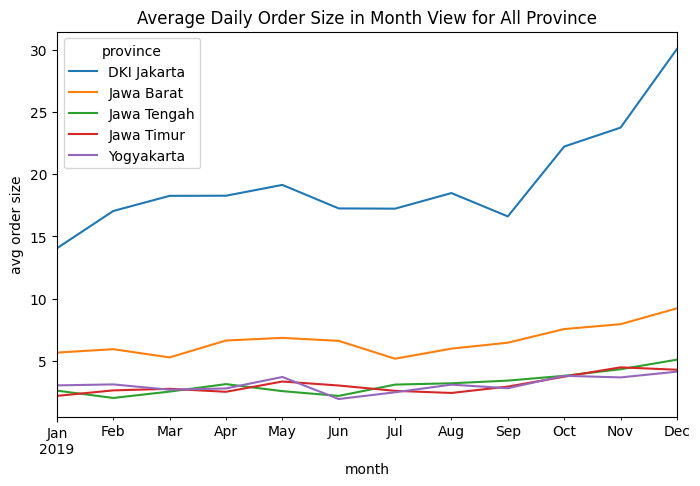

In [99]:
by_order_monthly_mean.plot(
   figsize = (8,5),
   title = 'Average Daily Order Size in Month View for All Province'
)
plt.ylabel('avg order size')
plt.xlabel('month')
plt.show()

## [10]. Create an Automation for Each Measurement (Column)

Steps 7 through 9 have only been completed for one measurement, the order column. That means four more instances of code like this must be written. Because the coding structure remains the same, we may use repetition based on the number of measurements, precisely 5, to display the five measurements graphically in a single canvas figure.


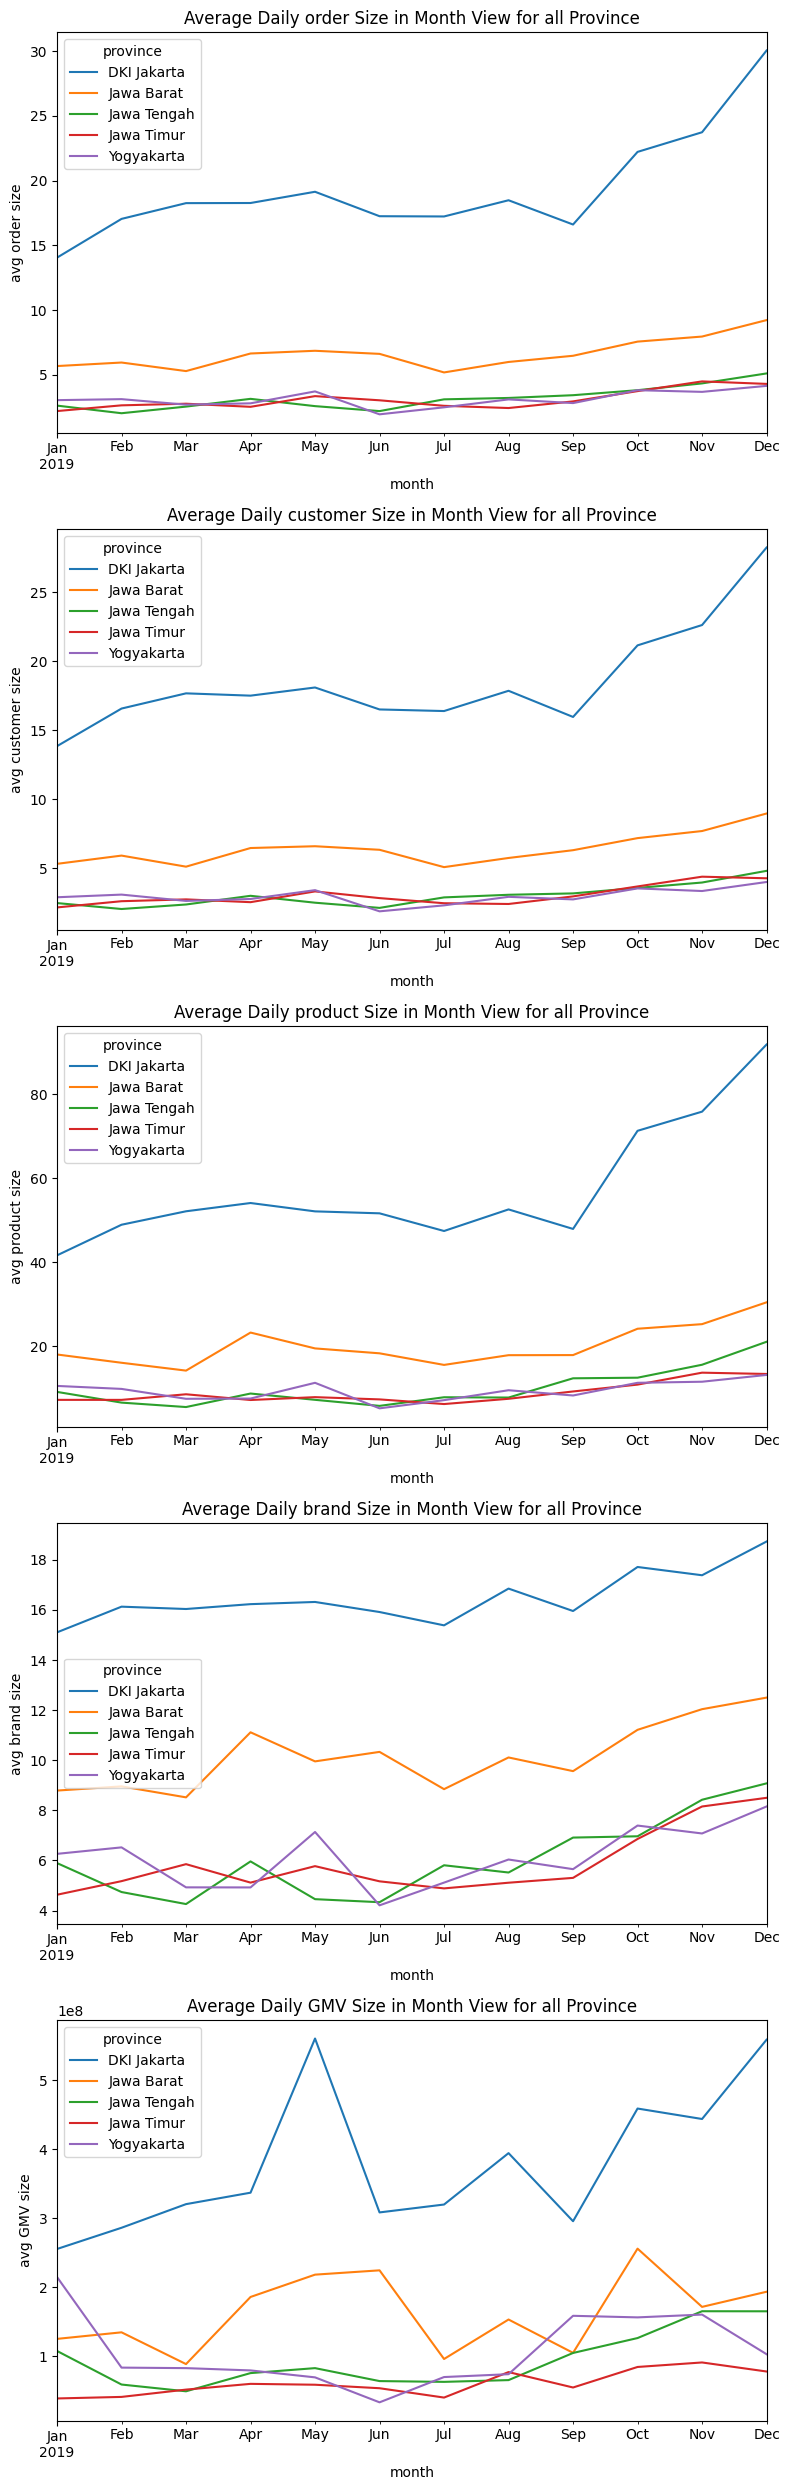

In [100]:
fig, axes = plt.subplots(5, 1, figsize=(8, 25))

idx = pd.IndexSlice
for i, measurement in enumerate(groupby_city_province.columns):
    by_measurement = unstack_city_province.loc[:,idx[measurement]]
    by_measurement_monthly_mean = by_measurement.resample('M').mean()
    by_measurement_monthly_mean.plot(
        title = 'Average Daily ' + measurement + ' Size in Month View for all Province',
        ax = axes[i]
    )
    axes[i].set_ylabel('avg ' + measurement + ' size')
    axes[i].set_xlabel('month')

plt.tight_layout()
plt.show()